In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [432]:
df1 = pd.read_csv('Location1.csv')
df2 = pd.read_csv('Location2.csv')
df3 = pd.read_csv('Location3.csv')
df4 = pd.read_csv('Location4.csv') 

In [433]:
with open('readme.txt') as f:
    readme=f.read()
    print(readme)

The columns in the data are as follows:

Time - Hour of the day when readings occurred
temperature_2m - Temperature in degrees Fahrenheit at 2 meters above the surface
relativehumidity_2m - Relative humidity (as a percentage) at 2 meters above the surface
dewpoint_2m - Dew point in degrees Fahrenheit at 2 meters above the surface
windspeed_10m - Wind speed in meters per second at 10 meters above the surface
windspeed_100m - Wind speed in meters per second at 100 meters above the surface
winddirection_10m - Wind direction in degrees (0-360) at 10 meters above the surface (see notes)
winddirection_100m - Wind direction in degrees (0-360) at 100 meters above the surface (see notes)
windgusts_10m - Wind gusts in meters per second at 100 meters above the surface
Power - Turbine output, normalized to be between 0 and 1 (i.e., a percentage of maximum potential output)

Notes:
	1) Likely many of these variables will not be very relevant. They are included here but do not need to be included in

In [434]:
updated_df = pd.concat([df1, df2, df3,df4], ignore_index=True)

In [435]:
updated_df.shape

(175200, 10)

In [436]:
updated_df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [437]:
updated_df.sample(5)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
38396,2021-05-20 20:00:00,69.4,61,55.5,2.28,5.81,128,139,4.2,0.3946
128584,2021-09-05 16:00:00,79.1,47,57.3,4.46,6.48,261,261,8.5,0.1875
42737,2021-11-17 17:00:00,58.2,93,56.3,4.75,8.87,221,220,10.2,0.9241
1161,2017-02-19 09:00:00,45.1,66,34.3,2.88,4.40,290,291,6.5,0.3093
64676,2019-05-21 20:00:00,49.6,69,39.7,6.75,11.75,83,85,14.1,0.6375


In [438]:
updated_df.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117


In [439]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 13.4+ MB


In [440]:
df1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [441]:
df2.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,42.725605,69.085091,32.215932,4.693236,7.572439,208.512626,206.555594,8.557470,0.249902
std,23.724354,17.317481,21.307625,2.238572,3.381060,103.088845,104.882857,3.710385,0.209088
min,-31.200000,16.000000,-36.200000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,26.100000,56.000000,18.600000,3.010000,5.110000,135.000000,129.000000,5.800000,0.076200
50%,42.700000,71.000000,32.000000,4.440000,7.400000,224.000000,218.000000,8.200000,0.194950
75%,63.000000,83.000000,50.600000,6.040000,9.740000,300.000000,302.000000,10.800000,0.381800
max,95.400000,100.000000,76.600000,18.270000,24.590000,360.000000,360.000000,29.000000,0.985900


In [442]:
df4.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,46.809829,70.956621,37.054274,4.012071,6.612864,199.400731,201.359954,7.688954,0.250926
std,21.561586,16.969744,20.995804,1.887665,2.869876,96.575068,97.207775,3.458954,0.228814
min,-28.800000,9.000000,-35.600000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000
25%,30.300000,59.000000,21.900000,2.550000,4.580000,129.000000,130.000000,5.000000,0.066700
50%,47.100000,73.000000,37.100000,3.750000,6.500000,207.000000,211.000000,7.300000,0.184700
75%,65.400000,85.000000,55.300000,5.210000,8.440000,284.000000,286.000000,9.900000,0.371825
max,93.800000,100.000000,77.900000,14.260000,21.750000,360.000000,360.000000,26.400000,0.988800


In [443]:
updated_df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


In [444]:
updated_df.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [445]:
updated_df.duplicated().sum()

np.int64(0)

In [446]:
updated_df['temperature_2m'].describe()

count    175200.000000
mean         46.655994
std          22.012738
min         -31.200000
25%          30.200000
50%          46.900000
75%          65.300000
max         101.700000
Name: temperature_2m, dtype: float64

In [447]:
numeric_cols = updated_df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')


<Axes: ylabel='temperature_2m'>

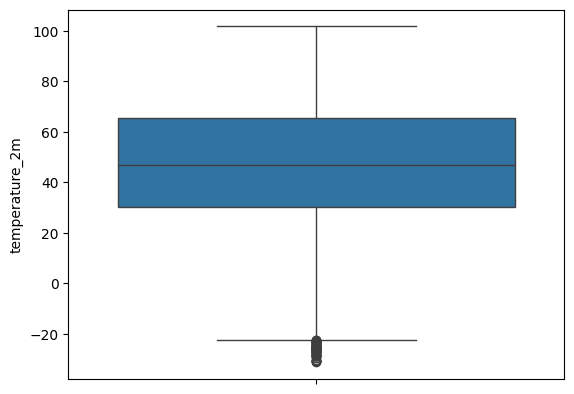

In [448]:
sns.boxplot(updated_df['temperature_2m'])

In [449]:
updated_df['relativehumidity_2m'].describe()

count    175200.000000
mean         70.155291
std          17.326678
min           9.000000
25%          57.000000
50%          72.000000
75%          84.000000
max         100.000000
Name: relativehumidity_2m, dtype: float64

<Axes: ylabel='relativehumidity_2m'>

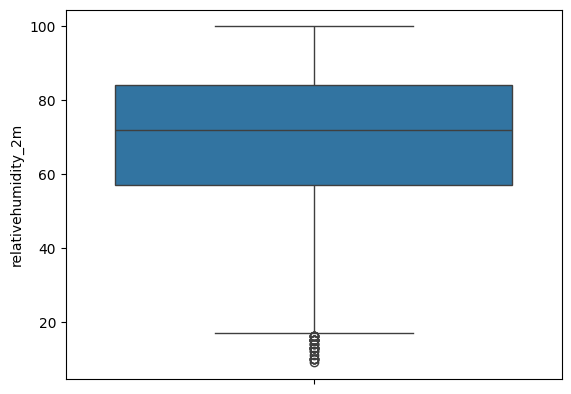

In [450]:
sns.boxplot(updated_df['relativehumidity_2m'])

In [451]:
updated_df['dewpoint_2m'].describe()

count    175200.000000
mean         36.516241
std          20.933153
min         -36.200000
25%          21.900000
50%          36.200000
75%          54.600000
max          78.700000
Name: dewpoint_2m, dtype: float64

<Axes: ylabel='dewpoint_2m'>

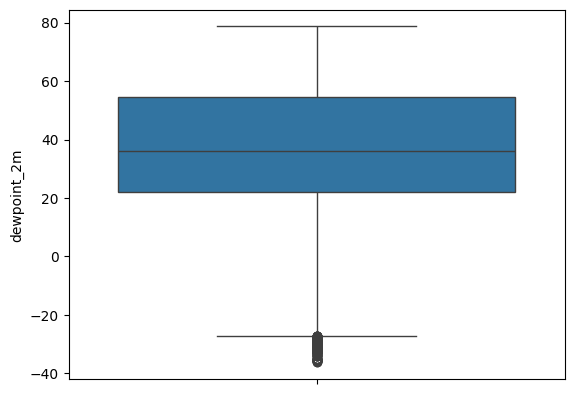

In [452]:
sns.boxplot(updated_df['dewpoint_2m'])

In [453]:
updated_df['windspeed_10m'].describe()

count    175200.000000
mean          4.157639
std           2.012682
min           0.000000
25%           2.630000
50%           3.850000
75%           5.380000
max          18.530000
Name: windspeed_10m, dtype: float64

<Axes: ylabel='windspeed_10m'>

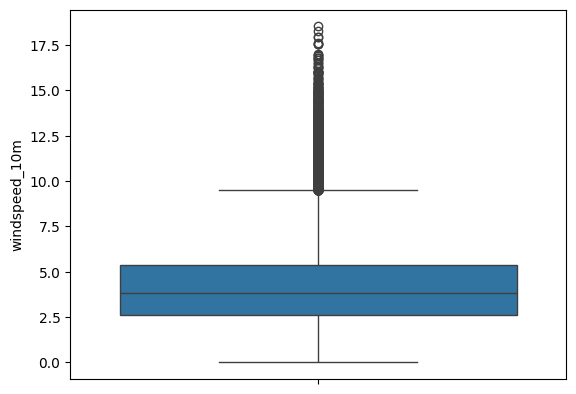

In [454]:
sns.boxplot(updated_df['windspeed_10m'])

In [455]:
updated_df['windspeed_100m'].describe()

count    175200.000000
mean          6.879334
std           3.043964
min           0.000000
25%           4.700000
50%           6.680000
75%           8.800000
max          24.590000
Name: windspeed_100m, dtype: float64

<Axes: ylabel='windspeed_100m'>

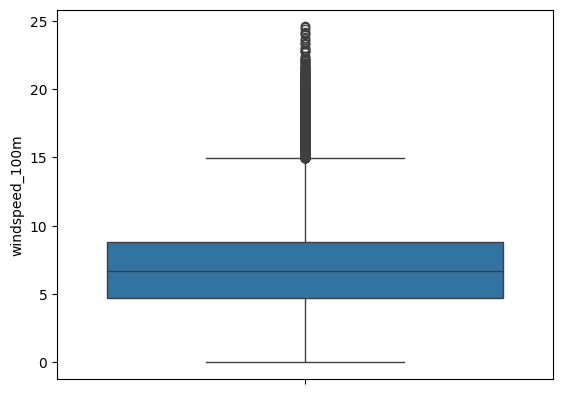

In [456]:
sns.boxplot(updated_df['windspeed_100m'])

In [457]:
updated_df['winddirection_10m'].describe()

count    175200.000000
mean        201.589446
std          99.639040
min           1.000000
25%         130.000000
50%         211.000000
75%         288.000000
max         360.000000
Name: winddirection_10m, dtype: float64

<Axes: ylabel='winddirection_10m'>

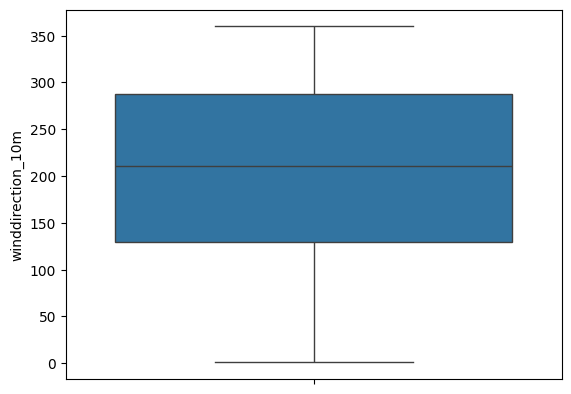

In [458]:
sns.boxplot(updated_df['winddirection_10m'])

In [459]:
updated_df['winddirection_100m'].describe()

count    175200.000000
mean        201.539070
std         100.683777
min           0.000000
25%         129.000000
50%         211.000000
75%         290.000000
max         360.000000
Name: winddirection_100m, dtype: float64

<Axes: ylabel='winddirection_100m'>

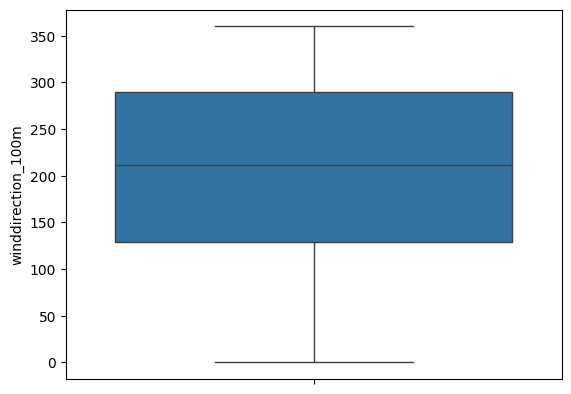

In [460]:
sns.boxplot(updated_df['winddirection_100m'])

In [461]:
updated_df['windgusts_10m'].describe()

count    175200.000000
mean          8.038205
std           3.617488
min           0.500000
25%           5.300000
50%           7.600000
75%          10.300000
max          29.200000
Name: windgusts_10m, dtype: float64

<Axes: ylabel='windgusts_10m'>

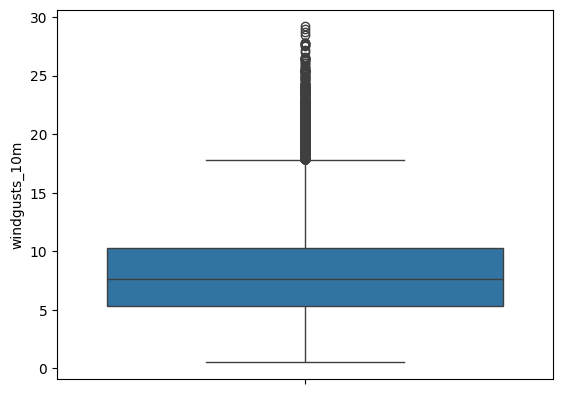

In [462]:
sns.boxplot(updated_df['windgusts_10m'])

In [463]:


for col in numeric_cols:
    lower_limit = updated_df[col].quantile(0.05)
    upper_limit = updated_df[col].quantile(0.95)

 
    updated_df[col] = np.where(updated_df[col] < lower_limit, lower_limit,
                       np.where(updated_df[col] > upper_limit, upper_limit, updated_df[col]))

<Axes: ylabel='dewpoint_2m'>

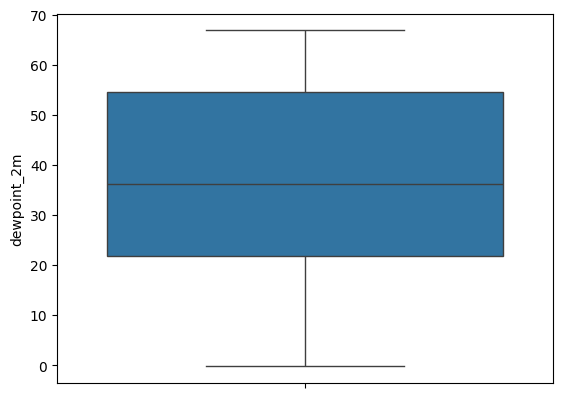

In [464]:
sns.boxplot(updated_df['dewpoint_2m'])

<Axes: ylabel='relativehumidity_2m'>

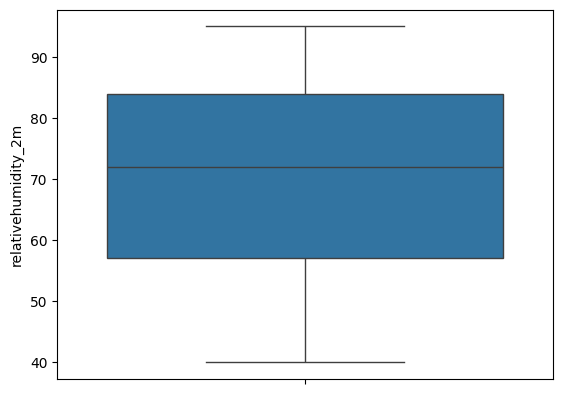

In [465]:
sns.boxplot(updated_df['relativehumidity_2m'])

<Axes: ylabel='dewpoint_2m'>

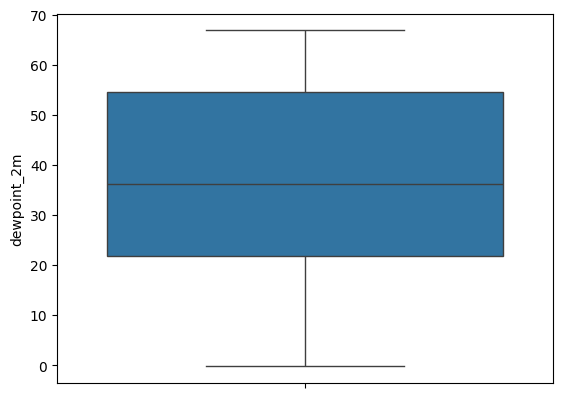

In [466]:
sns.boxplot(updated_df['dewpoint_2m'])

<Axes: ylabel='windspeed_10m'>

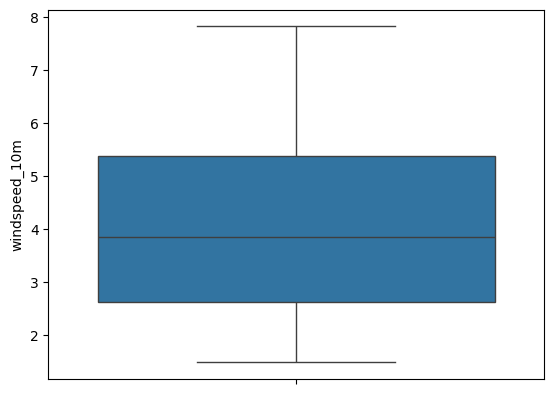

In [467]:
sns.boxplot(updated_df['windspeed_10m'])

<Axes: ylabel='windspeed_100m'>

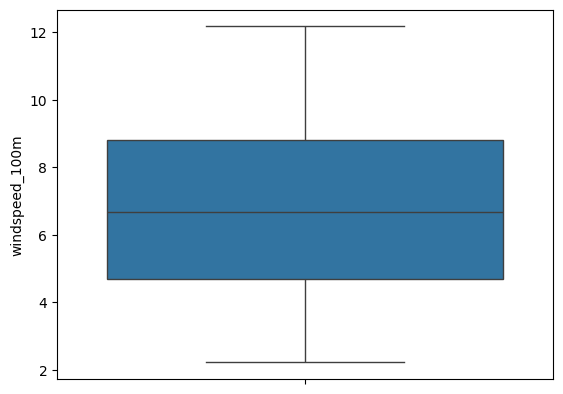

In [468]:
sns.boxplot(updated_df['windspeed_100m'])

<Axes: ylabel='winddirection_10m'>

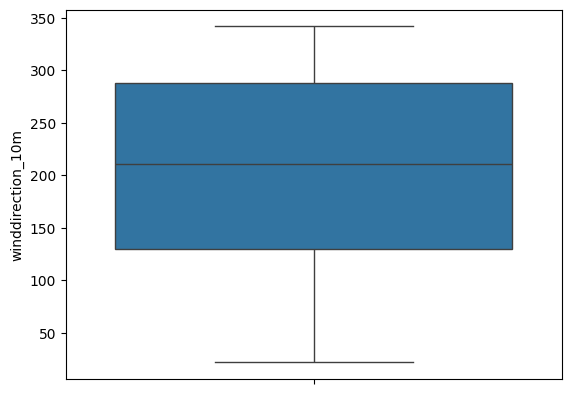

In [469]:
sns.boxplot(updated_df['winddirection_10m'])

<Axes: ylabel='winddirection_100m'>

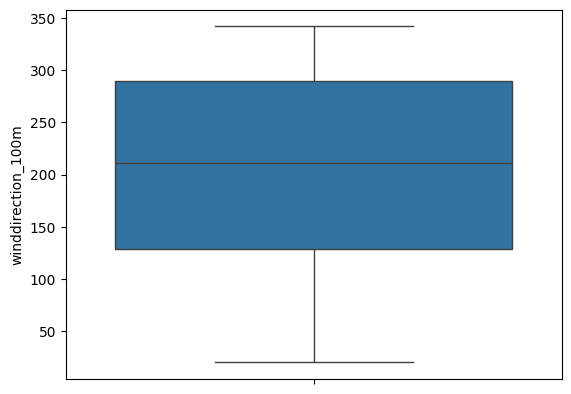

In [470]:
sns.boxplot(updated_df['winddirection_100m'])

<Axes: ylabel='windgusts_10m'>

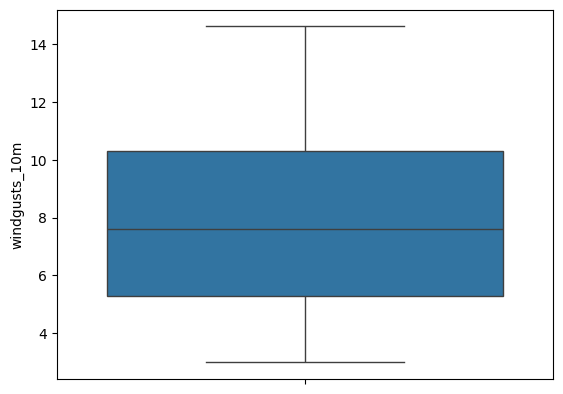

In [471]:
sns.boxplot(updated_df['windgusts_10m'])

In [472]:
num_cols = ['temperature_2m','relativehumidity_2m','dewpoint_2m',
            'windspeed_10m','windspeed_100m','winddirection_10m',
            'winddirection_100m','windgusts_10m','Power']


In [473]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
updated_df[num_cols] = scaler.fit_transform(updated_df[num_cols])


In [474]:
updated_df['Time'] = pd.to_datetime(updated_df['Time'])
updated_df['Hour'] = updated_df['Time'].dt.hour
updated_df['Month'] = updated_df['Time'].dt.month
updated_df['Day'] = updated_df['Time'].dt.day
updated_df.drop('Time', axis=1)


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Hour,Month,Day
0,-0.893517,0.885222,-0.624002,-1.452494,-1.662997,-0.568616,-0.399268,-1.501505,-0.548588,0,1,2
1,-0.898364,0.945766,-0.613880,-1.136859,-1.024371,-0.517560,-0.439627,-1.077518,-0.633649,1,1,2
2,-0.975919,1.248483,-0.624002,-1.452494,-1.460946,-0.548194,-0.520346,-1.440935,-0.718307,2,1,2
3,-0.946836,1.066853,-0.634125,-1.452494,-1.493418,-1.467205,-0.974389,-1.501505,-0.803369,3,1,2
4,-0.951683,1.066853,-0.644247,-0.909823,-0.865616,-1.467205,-1.186276,-1.198657,-0.888027,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
175195,-1.038931,1.430114,-0.649309,-0.057056,-0.061019,-1.834809,-1.832026,0.073303,0.169797,19,12,31
175196,-1.048626,1.309027,-0.689799,0.325028,0.249273,-1.834809,-1.832026,-0.017552,0.139562,20,12,31
175197,-1.068014,1.187940,-0.725228,0.275191,0.267314,-1.834809,-1.832026,-0.017552,0.109327,21,12,31
175198,-1.068014,1.127396,-0.745473,0.269654,0.220409,-1.834809,-1.832026,-0.047836,0.079092,22,12,31


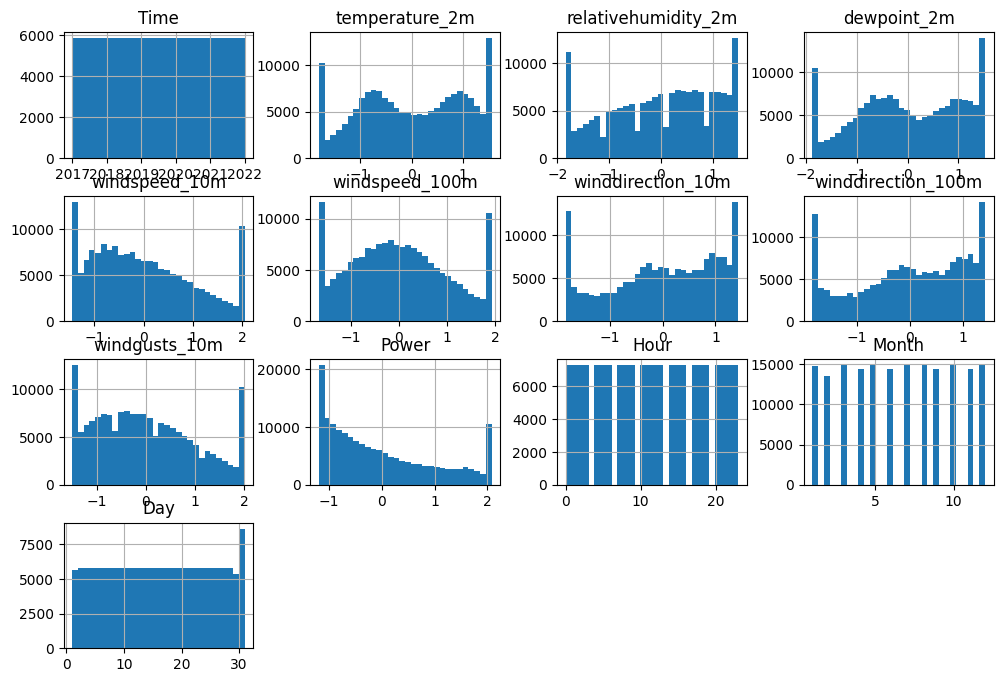

In [475]:
updated_df.hist(figsize=(12,8), bins=30)
plt.show()

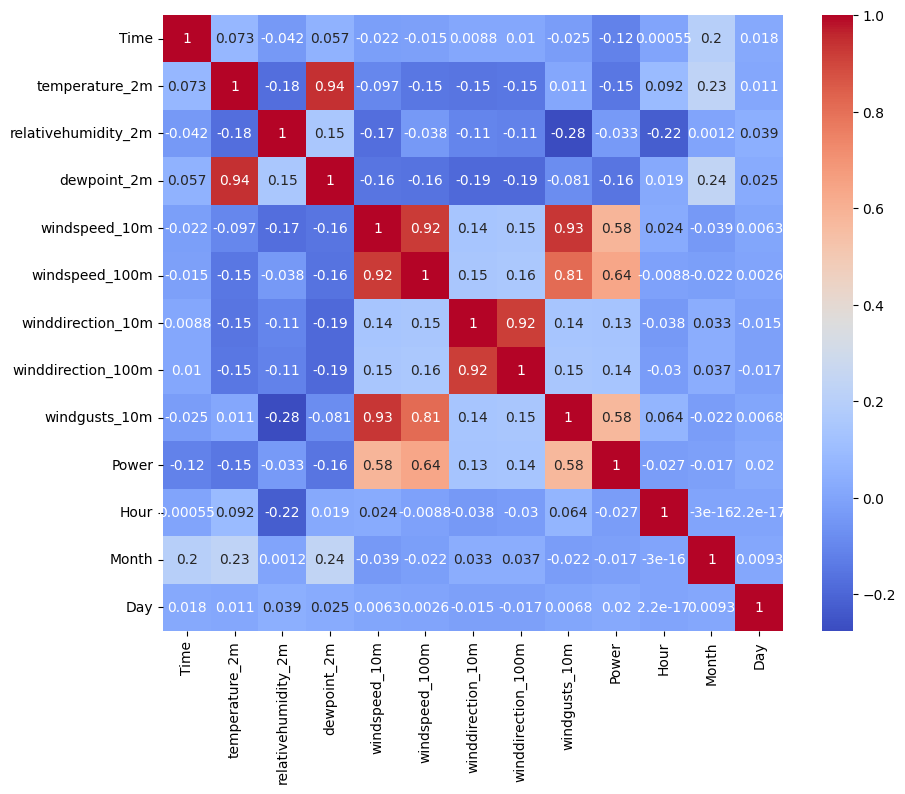

In [476]:
plt.figure(figsize=(10,8))
sns.heatmap(updated_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [477]:
corr = updated_df.corr()['Power'].sort_values(ascending=False)
print(corr)

Power                  1.000000
windspeed_100m         0.639662
windspeed_10m          0.582219
windgusts_10m          0.575929
winddirection_100m     0.140896
winddirection_10m      0.132378
Day                    0.020483
Month                 -0.016593
Hour                  -0.027244
relativehumidity_2m   -0.032937
Time                  -0.116915
temperature_2m        -0.150296
dewpoint_2m           -0.156620
Name: Power, dtype: float64


**Insights for ablove table:**


Power increases as WindSpeed increases → strong positive relation.
 Power decreases when Humidity rises → negative relation.
 Temperature affects Power moderately.

In [478]:
updated_df['Time'] = pd.to_datetime(updated_df['Time'], errors='coerce')
updated_df['Time_numeric'] = updated_df['Time'].map(pd.Timestamp.timestamp)


In [479]:
X = updated_df.drop('Power', axis=1)  
y = updated_df['Power']                


In [480]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


updated_df['Time'] = pd.to_datetime(updated_df['Time'], errors='coerce')
updated_df['Time_numeric'] = updated_df['Time'].map(pd.Timestamp.timestamp)


updated_df = updated_df.drop(columns=['Time'])


X = updated_df.drop(columns=['Power'])
y = updated_df['Power']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)


lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)




,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [483]:
from sklearn.metrics import mean_squared_error, r2_score

models = {'Linear Regression': lr, 
          'Decision Tree': dt, 
          'Random Forest': rf, 
          'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")
    print(f"  Approx. Accuracy = {r2 * 100:.2f}%")

Linear Regression: MSE = 0.53, R² = 0.47
  Approx. Accuracy = 46.92%
Decision Tree: MSE = 0.60, R² = 0.41
  Approx. Accuracy = 40.67%
Random Forest: MSE = 0.28, R² = 0.72
  Approx. Accuracy = 72.00%
Gradient Boosting: MSE = 0.46, R² = 0.55
  Approx. Accuracy = 54.73%


Insights by Model
Linear Regression

Simple model assuming a straight-line relationship.

R² = 0.47

This suggests that Power doesn’t depend linearly on all features — nonlinear relationships likely exist.

Decision Tree

Nonlinear model, but a single tree tends to overfit or underfit if not tuned well.

Slightly worse than Linear Regression here (R² = 0.41), possibly because it made too few or too many splits.

Random Forest

The best-performing model here (R² = 0.72).

Combines many trees (ensemble method) to reduce overfitting.

Captures complex patterns and generalizes well → ideal for this dataset.

Gradient Boosting

Second best (R² = 0.55).

Learns sequentially to correct previous errors, but can be sensitive to hyperparameters like learning rate or number of estimators.

With tuning, it could potentially surpass Random Forest.


# Overall Insights

Power output depends on nonlinear interactions between features — Random Forest captured this best.

Simpler models (Linear Regression, Decision Tree) underperformed, confirming the need for ensemble methods.

Random Forest’s MSE = 0.28 shows its predictions are much closer to actual values than the others.

Gradient Boosting may improve with tuning.